In [1]:
import shapely.geometry as sg
from shapely.wkt import loads
import numpy as np

from sklearn import preprocessing
import pandas as pd

ModuleNotFoundError: No module named 'shapely'

In [64]:
# df = pl.read_csv("../data/5MinFukushimaTrafficDataFrame.csv")
# df = pl.read_csv("../data/5minFukushimaActualCongestionData.tsv", sep="\t")
# read tsv file
df_5min = pd.read_csv("../data/5MinFukushimaTrafficDataFrame.csv")
df_1hr = pd.read_csv("../data/congestionlength_for_hours.csv")
df_1hr_time = pd.read_csv("../data/congestiontime_for_hours.csv")



In [65]:
df_1hr["timestamp"] = pd.to_datetime(df_1hr["timestamp"])
df_5min["Unnamed: 0"] = pd.to_datetime(df_5min["Unnamed: 0"])
df_1hr_time["timestamp"] = pd.to_datetime(df_1hr_time["timestamp"])
df_1hr = df_1hr.set_index("timestamp")
df_5min = df_5min.set_index("Unnamed: 0")
df_1hr_time = df_1hr_time.set_index("timestamp")

In [66]:
common_columns = df_5min.columns.intersection(df_1hr.columns)
# Get intersection of columns
df_5min = df_5min[common_columns]
df_1hr = df_1hr[common_columns]
df_1hr_time = df_1hr_time[common_columns]

In [5]:
# df_5min = df_5min.between_time('6:00:00', '00:00:00')
# df_5min = df_5min.drop(df_5min.columns[df_5min.max() == df_5min.min()], axis=1)

In [50]:
arr = df_1hr.values.T.copy() # canvert to numpy array
mask = arr != 0 # Convert all integer to boolean
arr[mask] = 1 # Convert all value to 1
congestion_density = arr.sum(axis=1) / 8784  # Calculate congestion density
indecies = congestion_density.argsort()[::-1] # Sort by descending order
indecies[:10] # Get top 10

array([ 67,  94,  68,  77, 128, 107, 108, 124, 161,  76], dtype=int64)

In [7]:
roads_vec = df_1hr.T.values
norms = np.linalg.norm(roads_vec, axis=1)
normlized_roads_vec = roads_vec / norms[:, np.newaxis]
cosine_sim = np.dot(normlized_roads_vec, normlized_roads_vec.T)
np.fill_diagonal(cosine_sim, 0)


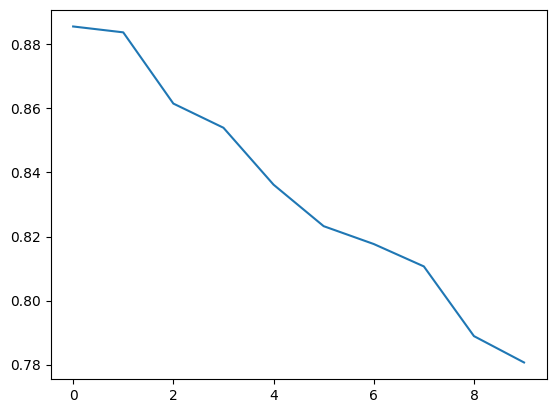

In [57]:
# Plot similarity 67 near the top 10
import matplotlib.pyplot as plt
plt.plot(cosine_sim[94][cosine_sim.argsort(axis=1)[94, ::-1][0:10]])

In [69]:
sorted_indecies = np.argsort(cosine_sim, axis=1)[:, ::-1]
top_10 = sorted_indecies[:, 0:10]
# print top 10 similar roads and their similarity in road 67
for i in range(10):
    print(top_10[94, i], cosine_sim[94, top_10[94, i]])

77 0.8855771895332932
68 0.8837427991131037
108 0.8615087064421325
107 0.8539582578456195
128 0.836189010257093
67 0.8232316322568378
76 0.8176562776621286
87 0.8106654864140778
135 0.7889028443754231
147 0.7806708693603327


In [33]:
cosine_sim.argsort(axis=1)[67, ::-1][0:5]

array([ 94,  68,  77, 108, 107], dtype=int64)

In [34]:
cosine_sim.argsort(axis=1)[94, ::-1][0:5]

array([ 77,  68, 108, 107, 128], dtype=int64)

In [35]:
cosine_sim.argsort(axis=1)[77, ::-1][0:5]

array([ 94,  68, 108, 107, 128], dtype=int64)

<Axes: xlabel='timestamp'>

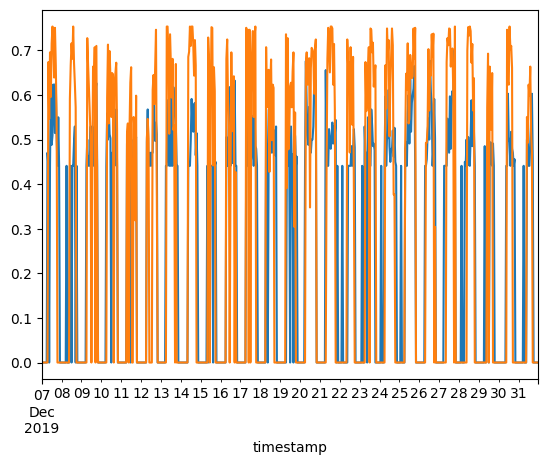

In [167]:
# df_5min.iloc[:300, 76].plot()
# df_5min.iloc[:300, 67].plot()
# df_5min.iloc[:300, 69].plot()
df_1hr.iloc[6000:6600, 67].plot()
df_1hr.iloc[6000:6600, 107].plot()


<Axes: xlabel='timestamp'>

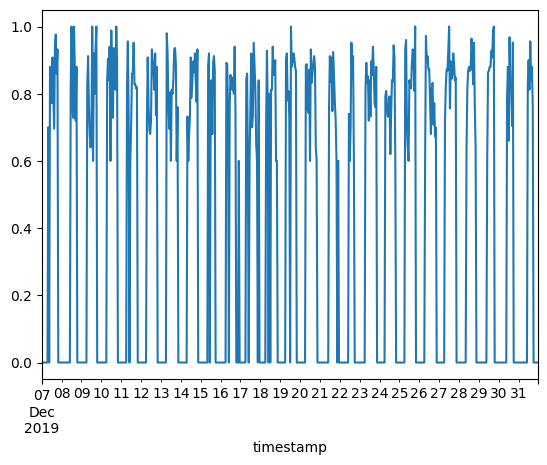

In [166]:
df_1hr.iloc[6000:6600, 94].plot()
# df_1hr.iloc[6500:6600, 77].plot()
# df_1hr.iloc[6500:6600, 68].plot()
# create new dataframe
# new_df_1hr = df_1hr.iloc[:, [94, 77, 68, 108, 107]]

In [59]:
new_df_1hr.to_csv("../data/5roads_1hr2.csv")

In [146]:
# get line strings from dataframe
line_strings = df_1hr.columns.values # get line strings from dataframe Except for the timestamp column
# convert line strings to shapely objects
line_strings = [loads(line_string) for line_string in line_strings] # convert line strings to shapely objects
# get centroids of each line
points = [line.centroid.coords[0] for line in line_strings] # get centroids of each line
points = np.array(points) # convert to numpy array
points[:, np.newaxis, :] # add axis

(1050, 1, 2)

In [147]:
diff = points[:, np.newaxis, :] - points # calculate the difference between each point and every other point by using numpy broadcasting
distances = np.linalg.norm(diff, axis=2) # calculate the distance between each point and every other point
distances = np.where(distances != 0, distances, np.inf) # set the distance between a point and itself to infinity
distances = np.argsort(distances, axis=1)[:, :5] # get the two closest points to each point

In [11]:
road1_src, road2_src, road3_src = torch.chunk(input_src, chunks=3, dim=1)
road1_src.shape

torch.Size([1, 1, 224, 224])

In [92]:
# 0.5以上の相関係数を持つ列のみを抽出し、該当しないものは削除
# df_5min_corr = df_5min_corr[(1.0 > df_5min_corr) & (df_5min_corr >= 0.5)].dropna(how="all").dropna(how="all", axis=1)


In [137]:
# df_5min_corr.iloc[:, 2]
# (37.65664712724178 140.43467345617404, 37.638315880307104 140.4341187980779)
# (37.73969271405845 140.41939314737513, 37.75108001626495 140.40967123890195)

LINESTRING (37.90995558168442 140.58103782964935, 37.90440044017346 140.5732609877007)     NaN
LINESTRING (37.65664712724178 140.43467345617404, 37.638315880307104 140.4341187980779)    NaN
LINESTRING (37.92134391590128 140.60714613991203, 38.003001227909934 140.6085310612316)    NaN
LINESTRING (37.49666390430248 140.380241113241, 37.486942676215286 140.3760752541502)      NaN
LINESTRING (37.599986575562426 140.42134390076873, 37.61887337090177 140.42384281077025)   NaN
                                                                                            ..
LINESTRING (37.240321584850605 140.98492296579118, 37.27865046168308 140.98158815560026)   NaN
LINESTRING (37.11700022849404 140.9138236128674, 37.11644459288831 140.90882406760736)     NaN
LINESTRING (37.12588895916121 140.9435428769184, 37.11644459288831 140.90882406760736)     NaN
LINESTRING (37.12588895916121 140.9435428769184, 37.11700022849404 140.9138236128674)      NaN
LINESTRING (37.17699521184494 140.97659325502053, 

In [115]:
# mask = ~df_5min_corr.isna()
# mask = mask.values
# df_5min_corr_arr = df_5min_corr.values
# idx = np.where(mask)


(array([  0,   1,   2, ..., 552, 553, 554], dtype=int64),
 array([324, 522, 490, ..., 551, 521, 268], dtype=int64))

In [74]:
road_5min = df_5min.values[indecies[0]]
road_5min
# road_1hr = df_1hr.values[indecies[0]]

array([0., 0., 0., ..., 0., 0., 0.])

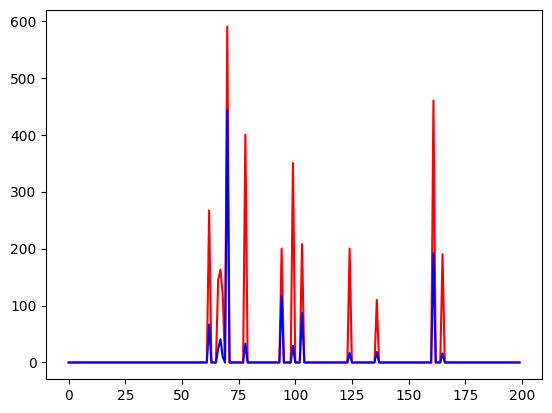

In [58]:
# plot 2 different time scale data
import matplotlib.pyplot as plt
plt.plot(road_1hr[:200], color="red")
plt.plot(road_5min[:200], color="blue")
plt.show()


In [148]:
n_road1, n_road2, n_road3, n_road4, n_road5 = distances[indecies[0]]

In [149]:
n_road1, n_road2, n_road3, n_road4, n_road5

(278, 337, 511, 557, 367)

In [150]:
road1_val = df_5min.iloc[:, int(n_road1)].values
road2_val = df_5min.iloc[:, int(n_road2)].values
road3_val = df_5min.iloc[:, int(n_road3)].values
road4_val = df_5min.iloc[:, int(n_road4)].values
road5_val = df_5min.iloc[:, int(n_road5)].values
original_road_val = df_5min.iloc[:, indecies[0]].values

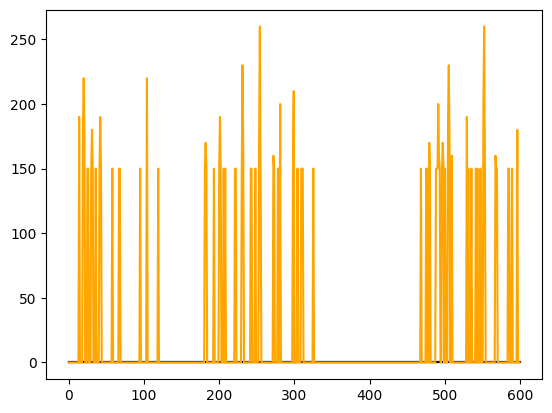

In [151]:
import matplotlib.pyplot as plt
# plt.plot(road1_val[:200], color="red")
plt.plot(road2_val[200:800], color="blue")
plt.plot(road3_val[200:800], color="green")
plt.plot(road4_val[200:800], color="yellow")
plt.plot(road5_val[200:800], color="black")
plt.plot(original_road_val[200:800], color="orange")

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df_congestion_length = pd.read_csv("../data/congestionlength_for_hours.csv")
df_congestion_time = pd.read_csv("../data/congestiontime_for_hours.csv")

df_congestion_length["timestamp"] = pd.to_datetime(df_congestion_length["timestamp"])
df_congestion_time["timestamp"] = pd.to_datetime(df_congestion_time["timestamp"])

In [62]:
df_congestion_length.iloc[:, 67]
# What is column number "LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)"?
# df_congestion_length.columns.get_loc("LINESTRING (37.49831756863525 139.92861354311296, 37.50303930381861 139.93055760322358)")

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8779    0.0
8780    0.0
8781    0.0
8782    0.0
8783    0.0
Name: LINESTRING (37.74219383824484 140.4685554336549, 37.7491376051663 140.4727214157237), Length: 8784, dtype: float64

In [44]:
new_df = df_congestion_length.iloc[:,  [67,  94,  68,  77, 128]]
df_congestion_length.iloc[:, 67].value_counts()

LINESTRING (37.74219383824484 140.4685554336549, 37.7491376051663 140.4727214157237)
0.0      8371
350.0      12
450.0      10
380.0       9
620.0       9
         ... 
564.0       1
788.0       1
405.0       1
649.0       1
480.0       1
Name: count, Length: 187, dtype: int64

In [160]:
new_df = pd.concat([df_congestion_length.iloc[:, 94], df_congestion_time.iloc[:, 94]], axis=1)


In [161]:
new_df.columns = ["congestion_length", "congestion_time"]

In [22]:
new_df.to_csv("../data/congestionlength_5roads_1hr.csv")

<Axes: >

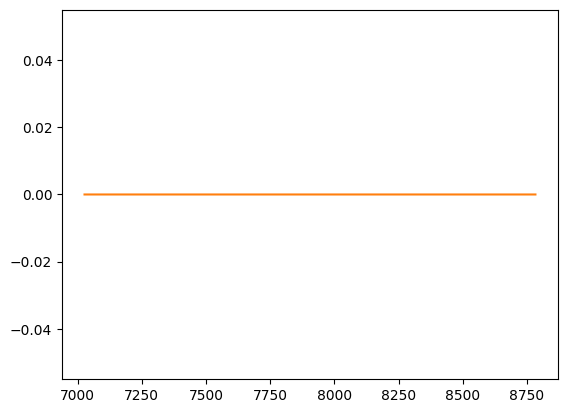

In [56]:
min_max_norm(df_congestion_length.iloc[7027:, 76]).plot()
df_congestion_time.iloc[7027:, 76].plot()